# CHEM 60 - March 4th, 2024 (Intro to Integration)

This is the first (of three!) classes on numerical integration. The goal of today is to get comfortable with three standard methods of integrating under curves (the intuitive rectangle method, the trapezoid rule, and the sometimes less intuitive but excellent Simpson's rule).

To get started, click on '**File**' in the left menu, then '**Save a copy in Drive**' to ensure you are editing *your* version of this assignment (if you don't, your changes won't be saved!). After you click '**Save a copy in Drive**' a popup that says **Notebook copy complete** should appear, and it may ask you to <font color='blue'>**Open in a new tab**</font>. When open, your new file will be named `Copy of CHEM60_Class_13_....ipynb` (you may want to rename it before/after you move it to your chosen directory).

#Imports

Here are the Python imports that we will need today. A tiny bit of default formatting is thrown in here (I like my font sizes to be larger than the default settings).

Run the below code block to get started.

In [ ]:
# Standard library imports
import math as m

# Third party imports
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# so the notebook shows an animation
rc('animation', html='html5')

# This part of the code block is telling matplotlib to make certain font sizes exra, extra large by default
# Here is where I list what parametres I want to set new defaults for
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
# This line updates the default parameters of pyplot (to use our larger fonts)
plt.rcParams.update(params)

First, mount the Drive. You hopefully remember this from week 0. If the details of things like imports or data access need to be clarified, go back and check out the [class 0](https://colab.research.google.com/drive/1q96pdc5CBfjhqkALe-ohqPJwNMcXzwqS?usp=share_link) notebook on this.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Assuming you ended up with `Mounted at /content/gdrive`, you're good to move on!



---



# The Trapezoid Rule

You likely have seen this one before. The Trapezoid Rule is a method used to approximate the integral of a function. By dividing the interval from `a` to `b` into `n` subintervals and calculating the area of trapezoids formed under the curve, we can get a numerical approximation for the integral.

The `trapezoid_rule` function provided here implements this concept. It calculates the area of each trapezoid by using the average of the function values at the endpoints and intermediate points within the interval. By summing these areas and multiplying by the width of each subinterval, we get an estimation of the integral.

This approach is based on the formula for the area of a trapezoid and can be a useful tool for approximating integrals, especially when the function is not easily integrable analytically. We are going to demo it today on functions that have analytical integrals to show how well it works, but it applies to all curves that you could essentially colour in the space between the curve and the axis.

The `trapezoid_rule` function below calculates the numerical approximation of the integral of a function `func` using the trapezoid rule. This approximation is calculated over the interval from `a` to `b` and uses `n` divisions or subintervals.

The formula for the area of a single trapezoid is:

$$ \frac{b-a}{2} \times (f(a) + f(b)) $$

In the `trapezoid_rule` function, the trapezoid rule is generalized to `n` subintervals, i.e., `n` trapezoids. The formula for the area in this case is:

$$ w \times \left[ \frac{1}{2}f(a) + f(x_1) + f(x_2) + \ldots + f(x_{n-1}) + \frac{1}{2}f(b) \right] $$

Here, `w` represents the width of each subinterval and is calculated as `(b-a) / n`.

The accumulation of the function evaluations to the sum `s` starts by adding half of the first (`func(a)`) and last (`func(b)`) function values.

The function then steps through each intermediate point from `1` to `n-1`, adding twice the function value at each of these points into the sum `s` with the expression `s += 2 * func(a + i * w)`.

The resulting sum is then multiplied by `w` and divided by `2` to yield the final approximation of the integral.

In [ ]:
def trapezoid_rule(func, a, b, n):
    w = (b-a) / n
    s = func(a) + func(b)

    for i in range(1, n):
        s += 2 * func(a + i * w)

    return s * w / 2

Okay. That isn't very exciting. Let's test it out (in animation form!)

In [ ]:
# Function to be integrated
def func(x):
    return np.sin(x)

# Values
a = 0
b = np.pi
x = np.linspace(a, b, 1000)
y = func(x)

# Create the base figure
fig, ax = plt.subplots()

# Initialization function for the animation
def init():
    ax.plot(x, y, 'r', alpha=0.6, lw=2)
    ax.set_xlim(a, b)
    ax.set_ylim(0, 1.1)

# Function that will be called on each frame
def update(n):
    ax.clear()
    ax.plot(x, y, 'r', alpha=0.6, lw=2)
    ax.set_xlim(a, b)
    ax.set_ylim(0, 1.1)

    # Calculate trapezoids and plot them
    x_values = np.linspace(a, b, n+1)
    y_values = func(x_values)

    for i in range(n):
        vertices = [[x_values[i], 0], [x_values[i], y_values[i]], [x_values[i+1], y_values[i+1]], [x_values[i+1], 0]]
        poly = plt.Polygon(vertices, edgecolor='0.2', facecolor='0.2', alpha=0.5)
        ax.add_artist(poly)

ani = animation.FuncAnimation(fig, update, frames=range(1,50), init_func=init)
plt.close()
ani

That is always enjoyable

## PRACTICE PROBLEM

Add comments to the above code so you know you are comfortable with what each line does!

# The Rectangle Method

So, a worse, but perhaps even more visually intuitive method of numerical integration is known, descriptively, as the rectangle method (also called the mid-point method). The rectangle method approximates the area under the curve by a series of rectangles. The height of each rectangle is the function value at the center/midpoint of the interval. The area is then the height multiplied by width of each rectangle, which is the width of the sub-interval. The total area is calculated as the sum of the areas of all such rectangles.

Below, the `rectangle_area` function calculates the numerical approximation of an integral of a function `func` using the rectangle method over the interval from `a` to `b` with `n` divisions/subintervals.

The formula for a single rectangle's area is:

$$ w \times f(x) $$

In the function `rectangle_area`, the rectangle method is generalized to `n` subintervals (i.e., `n` rectangles), which gives us:

$$ w \times \left[ f(x_1) + f(x_2) + \ldots + f(x_{n-1}) + f(x_{n}) \right] $$

`w` represents the width of each subinterval and is calculated as `(b-a) / n`.

The function then steps through each point, adding each function value into the sum with the line `sum += func(x_values[i])*w`.

The result gives us the sum of the areas of all the rectangles which provides an approximation to the definite integral of the function.

In [ ]:
# Function to calculate rectangle area
def rectangle_rule(func, a, b, n):
    w = (b - a) / n
    x_values = np.linspace(a, b, n)
    return np.sum(func(x_values) * w)

Again, let's animate it!

In [ ]:
# Create the base figure
fig, ax = plt.subplots()

# Function that will be called on each frame
def update(n):
    ax.clear()
    ax.plot(x, y, 'r', alpha=0.6, lw=2)
    ax.set_xlim(a, b)
    ax.set_ylim(0, 1.2)

    # Calculate rectangles and plot them
    x_values = np.linspace(a, b, n+1)
    y_values = func(x_values)
    width = (b - a) / (n)

    ax.bar(x_values, y_values, width=width, color='0.2', edgecolor='0', alpha=0.5)

ani = animation.FuncAnimation(fig, update, frames=range(1,50), init_func=init)
plt.close()
ani

## PRACTICE PROBLEM

Add comments to the above code (the plot is made a bit differently this time! Why might that be?)


---



**notes**



---



Okay. The first one looks better, but how can we know for sure that it's better?

We are testing this on a function that has a simple analytical integral within the bounds we are plotting. Let's look at how well the two different methods perform.

In [ ]:
# Analytical solution
analytical = 2 # The integral ∫ sin(x) dx from 0 to pi is -cos(pi) + cos(0) which equals 2

# Arrays to hold computed areas and errors
area_rec = []
area_trap = []
err_rec = []
err_trap = []

# Arrays to hold numbers of bins
bins = []

# Iterate over different numbers of bins
for n in range(1, 51):
    # Add number of bins to list
    bins.append(n)

    # Create x and y values
    x_values = np.linspace(a, b, n+1)
    y_values = func(x_values)

    # Rectangle Rule
    rec_sol = rectangle_rule(func, a, b, n)

    # Trapezoidal Rule
    trap_sol = trapezoid_rule(func, a, b, n)

    # Calculate areas and errors and add to lists
    area_rec.append(rec_sol)
    err_rec.append(abs((rec_sol - analytical) / analytical))
    area_trap.append(trap_sol)
    err_trap.append(abs((trap_sol - analytical) / analytical))

## PRACTICE PROBLEM


```
    # Calculate areas and errors and add to lists
    area_rec.append(rec_sol)
    err_rec.append(abs((rec_sol - analytical) / analytical))
    area_trap.append(trap_sol)
    err_trap.append(abs((trap_sol - analytical) / analytical))
```

What is happening here, and why?


---




**notes**



---



Let's make a plot to really see what is going on:

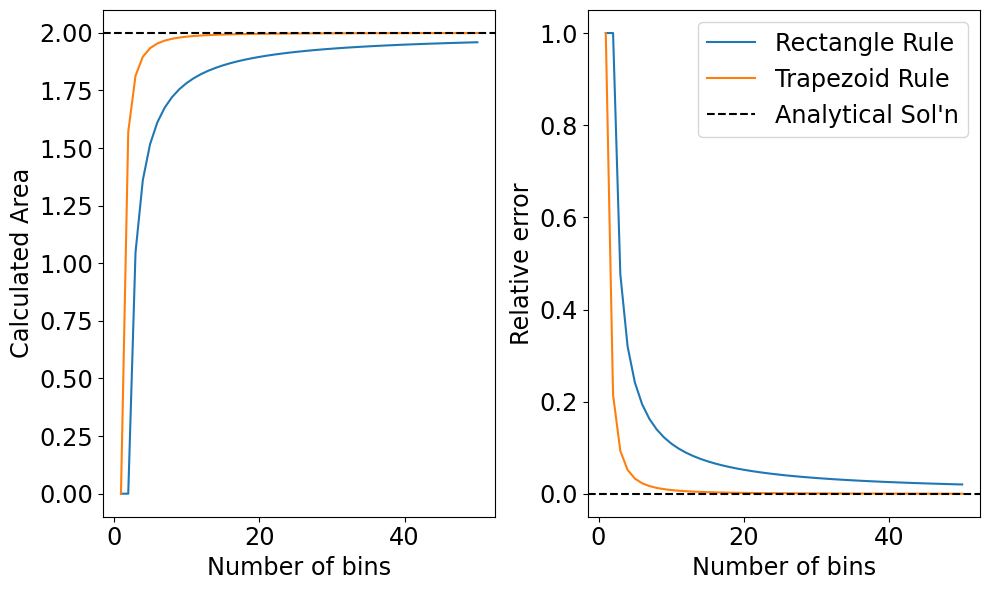

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))

# Plot calculated areas
axs[0].plot(bins, area_rec, label='Rectangle Rule')
axs[0].plot(bins, area_trap, label='Trapezoid Rule')
axs[0].axhline(y=analytical, color='k', linestyle='--', label="Analytical Sol'n")
axs[0].set_xlabel('Number of bins')
axs[0].set_ylabel('Calculated Area')

# Plot RMSEs
axs[1].plot(bins, err_rec, label='Rectangle Rule')
axs[1].plot(bins, err_trap, label='Trapezoid Rule')
axs[1].axhline(y=0, color='k', linestyle='--', label="Analytical Sol'n")
axs[1].set_xlabel('Number of bins')
axs[1].set_ylabel('Relative error')
axs[1].legend()

plt.tight_layout()
plt.show()

## PRACTICE QUESTION

What do you notice about the difference between these two methods? Why is one clearly better than the other in this case?



---



**code**



---



# Simpson's Rule

The next common method for approximating integrals is known as the Simpson's 1/3 rule.

Simpson's rule is based on the idea that one can obtain a better approximation to the integral by approximating the integrand by a quadratic function (instead of the straight lines the trapezoid rule draws). The formula for Simpson's rule on the interval [a,b] is:

$$ \frac{b - a}{6} \left[ f(a) + 4f\left(\frac{a + b}{2}\right) + f(b) \right] $$


The `simpson_rule` function below calculates the numerical approximation of an integral of a function `func` using Simpson's rule over the interval from `a` to `b` with `n` divisions or subintervals.

Note that `n` should be an even number due to Simpson's rule requiring an even number of divisions. If an odd value is provided, 1 is added to ensure an even number.

In [ ]:
def simpson_rule(func, a, b, n):
    # If n is odd, increment by 1 to make it even
    if n % 2:
        n += 1

    w = (b - a) / n

    s = func(a) + func(b)

    for i in range(1, n, 2):
        s += 4 * func(a + i * w)
    for i in range(2, n, 2):
        s += 2 * func(a + i * w)

    return s * w / 3

 In Simpson's rule:

1. The interval `[a, b]` on which we want to integrate the function `f(x)` is divided into `n` even number of subdivisions. Each pair of subdivisions forms a subinterval.

2. In each of these subintervals, we consider the function values at three points: the two endpoints and the midpoint.

3. We treat these three points as being on a parabola. This is a reasonable assumption for many functions where a quadratic (second-order) approximation can capture the behavior of the function pretty well over a *small* region (you saw this with the molecular energy calculations!).

4. We then calculate the area under this parabolic arc which is given by the formula:

    $$ \frac{b - a}{6} \left[ f(a) + 4f\left(\frac{a + b}{2}\right) + f(b) \right] $$

#### More on the formula

Suppose we have a quadratic function that passes through three equally-spaced points $a$, $m$ and $b$, such that $b-a$ = $2h$. In other words, $h = (b - a)/2$. Our approximation of the area under the curve between x=a and x=b is given by the following:

$$
\int_{a}^{b} f(x) \,dx \approx \frac{h}{3} \left[ f(a) + 4f\left(a + h \right) + f(b) \right]
$$

I had originally made several weird typoes working through this approximation, so instead I will direct you to the [pdf from a Notre Dame](https://coast.nd.edu/jjwteach/www/www/30125/pdfnotes/lecture15_18v13.pdf) math course walking through it. This set of notes from [Stanford](https://web.stanford.edu/group/sisl/k12/optimization/MO-unit4-pdfs/4.2simpsonintegrals.pdf) is even more readable if you've not had this recently in MATH 19. I also like this page from [UBC](https://personal.math.ubc.ca/~CLP/CLP2/clp_2_ic/ssec_num_int_err.html) which goes more into error than we are doing here (but you might enjoy it!).

5. The areas calculated in step 4 throughout all the subintervals are summed up. This sum provides the approximation to the integral of the function over the entire interval `[a, b]`.

Think of Simpson's Rule as estimating the area under a series of parabolic segments rather than rectangular or trapezoidal ones, which tends to provide a better approximation because of the curvature taken into account. Most, smooth functions can be approximated like this.

This is all well and good. But let's test it!


In [ ]:
# Array to hold computed areas and errors
area_simp = []
err_simp = []

# Iterate over different numbers of bins
for n in range(2, 51, 2):
    # Simpson's Rule
    simp_sol = simpson_rule(func, a, b, n)

    # Calculate areas and errors and add to lists
    area_simp.append(simp_sol)
    err_simp.append(abs((simp_sol - analytical) / analytical))

Let's add it to our plot:

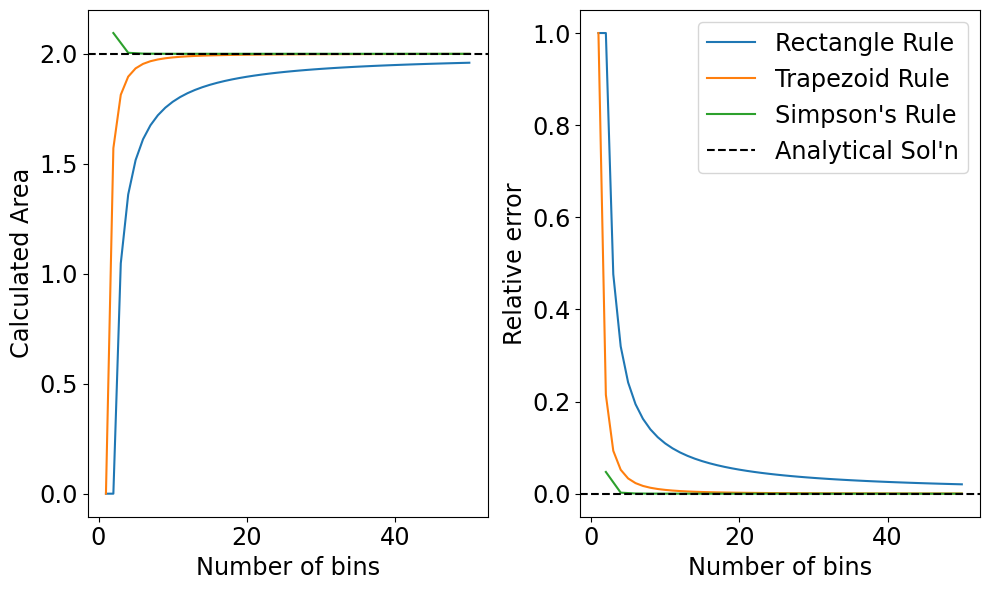

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))

# Plot calculated areas
axs[0].plot(bins, area_rec, label='Rectangle Rule')
axs[0].plot(bins, area_trap, label='Trapezoid Rule')
axs[0].plot(bins[1::2], area_simp, label='Simpson\'s Rule')
axs[0].axhline(y=analytical, color='k', linestyle='--', label="Analytical Sol'n")
axs[0].set_xlabel('Number of bins')
axs[0].set_ylabel('Calculated Area')

# Plot RMSEs
axs[1].plot(bins, err_rec, label='Rectangle Rule')
axs[1].plot(bins, err_trap, label='Trapezoid Rule')
axs[1].plot(bins[1::2], err_simp, label='Simpson\'s Rule')
axs[1].axhline(y=0, color='k', linestyle='--', label="Analytical Sol'n")
axs[1].set_xlabel('Number of bins')
axs[1].set_ylabel('Relative error')
axs[1].legend()

plt.tight_layout()
plt.show()


Wow, that started excellent and ended excellent. Let's watch the animation.

In [ ]:
# Function that will be called on each frame
def update_simpson(n):
    ax.clear()
    ax.plot(x, y, 'r', alpha=0.6, lw=2)
    ax.set_xlim(a, b)
    ax.set_ylim(0, 1.1)

    # Calculate points and plot them
    x_values = np.linspace(a, b, n+1)
    y_values = func(x_values)

    for i in range(0, n, 2): # With Simpson's Rule we take steps of two
        xx = np.linspace(x_values[i], x_values[i+2], 10) # 10 points to create a smooth parabola
        parabola = np.poly1d(np.polyfit([x_values[i], x_values[i+1], x_values[i+2]],
                                         [y_values[i], y_values[i+1], y_values[i+2]], 2)) # Fit a parabola to each slice
        ax.fill_between(xx, parabola(xx), color='0.2', alpha=0.5) # Fill under the parabola
# Values
a = 0
b = np.pi
x = np.linspace(a, b, 1000)
y = func(x)

# Create the base figure
fig, ax = plt.subplots()

simpson_ani = animation.FuncAnimation(fig, update_simpson, frames=range(2, 51, 2), init_func=init)
plt.close()
simpson_ani

That honestly gets good too fast to see what is happening. Let's look at individual frames below:

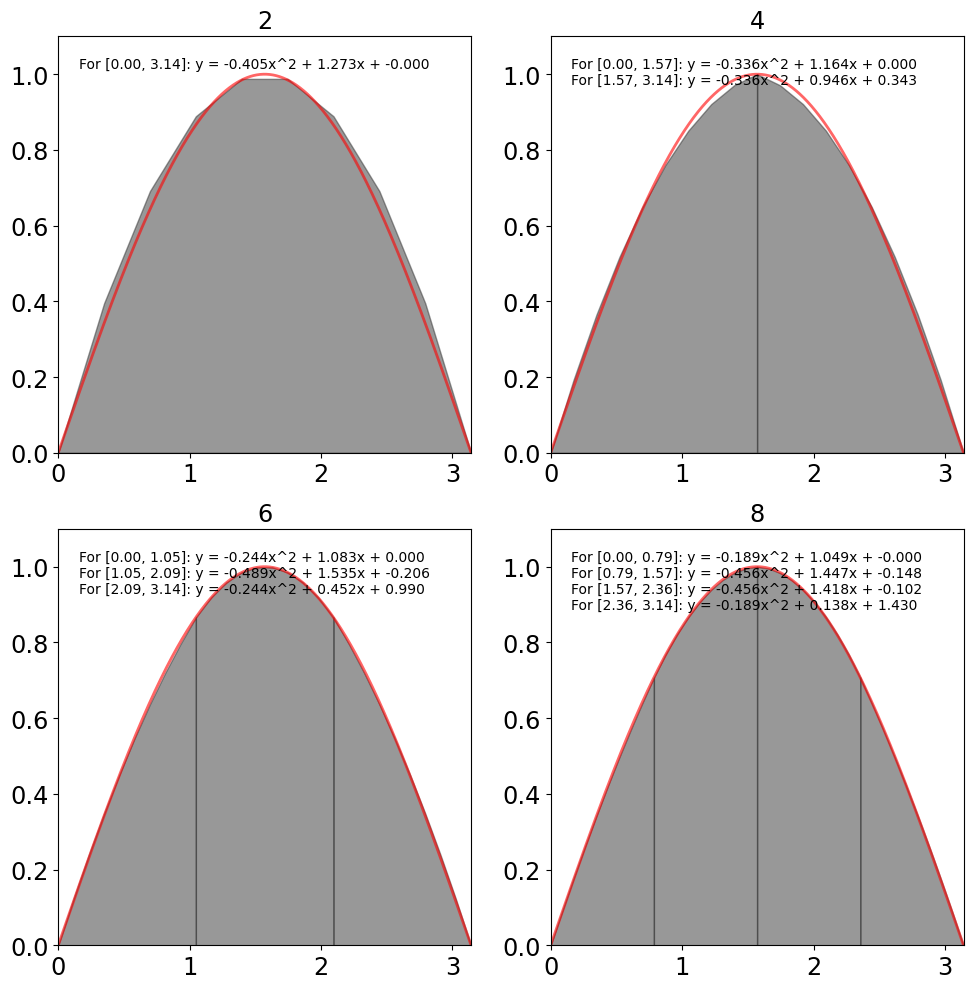

In [ ]:
def plot_simpson(n, ax):
    ax.plot(x, y, 'r', alpha=0.6, lw=2)
    ax.set_xlim(a, b)
    ax.set_ylim(0, 1.1)

    x_values = np.linspace(a, b, n+1)
    y_values = func(x_values)

    parabola_texts = []

    for i in range(0, n, 2):
        xx = np.linspace(x_values[i], x_values[i+2], 10)
        coeffs = np.polyfit([x_values[i], x_values[i+1], x_values[i+2]],
                            [y_values[i], y_values[i+1], y_values[i+2]], 2)
        parabola = np.poly1d(coeffs)
        ax.fill_between(xx, parabola(xx), color='0.2', alpha=0.5)

        # Create formatted string of the parabola equation and add to the list
        parabola_eq = "y = {:.3f}x^2 + {:.3f}x + {:.3f}".format(*coeffs)
        parabola_texts.append(f"For [{x_values[i]:.2f}, {x_values[i+2]:.2f}]: {parabola_eq}")

    # Add equations as annotations to the plot
    text = "\n".join(parabola_texts)
    ax.text(0.05, 0.95, text, transform=ax.transAxes, verticalalignment='top')

    ax.set_title(f'{n}')

# Choose a set of bins
n_values = [2, 4, 6, 8]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i, ax in enumerate(axs.flatten()):
    plot_simpson(n_values[i], ax)

plt.tight_layout()
plt.show()

# PRACTICE QUESTION

Convince yourself these are parabola segments! Here is in the first case (n = 2).

In [ ]:
x_values = np.linspace(a, b, 3)
y_values = func(x_values)

i = 0  # For the first subplot with n=2
coeffs = np.polyfit([x_values[i], x_values[i+1], x_values[i+2]],
                    [y_values[i], y_values[i+1], y_values[i+2]], 2)
parabola_eq = "y = {:.3f}x^2 + {:.3f}x + {:.3f}".format(*coeffs)

print(f"For [{x_values[i]:.2f}, {x_values[i+2]:.2f}]: {parabola_eq}")

For [0.00, 3.14]: y = -0.405x^2 + 1.273x + -0.000


And plot:

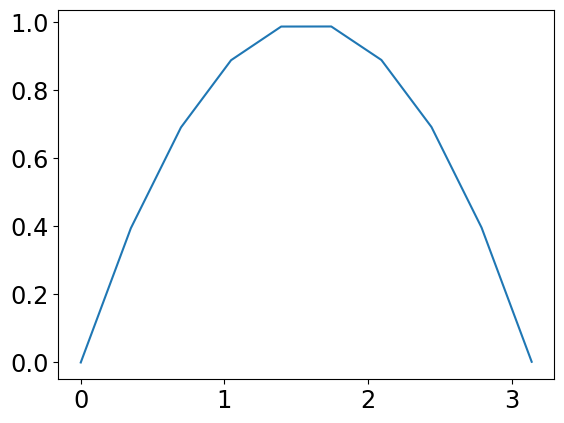

In [ ]:
x = np.linspace(0,3.14,10)
y = coeffs[0]*x**2 + coeffs[1]*x + coeffs[2]
plt.plot(x, y)
plt.show()

try recreating the parabolas for n = 4 to make sure you understand what is happening.



---



In [ ]:
# test things@



---



So how does this find areas again?

Let's step through what the Simpson's rule is doing when `n = 2`. It's essentially fitting a parabola to three points: `(a, f(a))`, `(a + h, f(a + h))`, and `(b, f(b))`, where `h = (b - a) / 2` is the step size. The three points for our example would be `(a, f(a))`, `(a + h, f(a + h))`, and `(b, f(b))`.

Simpson's rule then approximates the integral as the area under this parabola.

Let's first calculate these three points and plot them along with the function, as well as showing the true area under the curve for comparison:

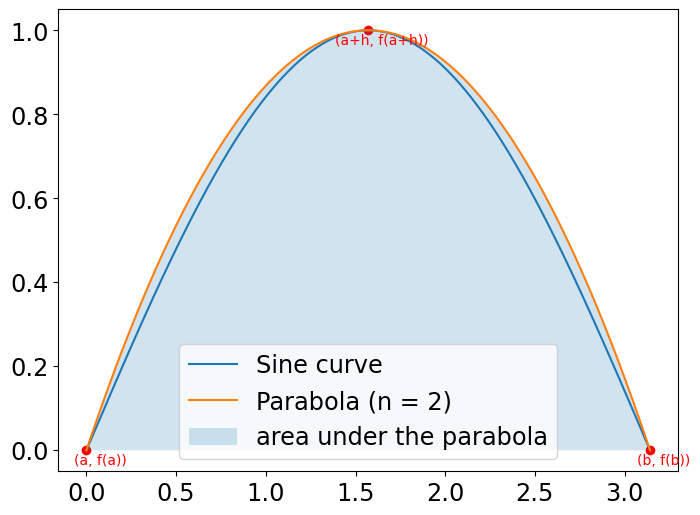

In [ ]:
# Define function
def n_equal_2_parabola_fit(x):
  i = 0

  # Coefficients of the quadratic equation (parabola)
  coeffs = np.polyfit([x_values[i], x_values[i+1], x_values[i+2]],
                      [y_values[i], y_values[i+1], y_values[i+2]], 2)

  return coeffs[0]*x**2 + coeffs[1]*x + coeffs[2]

# Define the integral bounds and subintervals
n = 2
h = (b - a) / n

# Get the x values at each subinterval
x_values_at_subintervals = np.linspace(a, b, n+1)
# Compute the y values for these x values
y_values_at_subintervals = n_equal_2_parabola_fit(x_values_at_subintervals)

# Create an array of x values for plotting the function smoothly
x_smooth = np.linspace(a, b, 500)
# Compute the y values for this x array
y_smooth = n_equal_2_parabola_fit(x_smooth)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x_smooth, func(x_smooth), label="Sine curve")
plt.plot(x_smooth, y_smooth, label="Parabola (n = 2)")

# Plot the points used for Simpson's rule
plt.scatter(x_values_at_subintervals, y_values_at_subintervals, color="red")
for i, txt in enumerate(['(a, f(a))', '(a+h, f(a+h))', '(b, f(b))']):
    plt.annotate(txt, (x_values_at_subintervals[i], y_values_at_subintervals[i]), textcoords="offset points", xytext=(10,-10), ha='center', color="red")

# Plot the true area under the function curve
plt.fill_between(x_smooth, 0, y_smooth, alpha=0.2, label="area under the parabola")

plt.legend()
plt.show()

Now, let's show visually how Simpson's Rule approximates this area by plotting the parabola corresponding to the quadratic interpolant of these three points:

In [ ]:
print("Area under the curve, according to the Simpson rule, for n = 2: ", round(simpson_rule(func, a, b, 2),3))

Area under the curve, according to the Simpson rule, for n = 2:  2.094


First, we need to find the antiderivative:

$$ F(x) = \int -0.405 x^2 + 1.273x \, dx = -0.135x^3 + 0.6365x^2 $$

Let's find the area from $x = 0$ to $x = \pi$. We need to calculate F(b) - F(a):

In [ ]:
# Define the antiderivative
def F(x):
    return coeffs[0]/3*x**3 + coeffs[1]/2*x**2 + coeffs[2]*x

# Calculate F(b) - F(a)
a = 0
b = m.pi  # This is Pi

area = F(b) - F(a)
print("Area under the our first parabola: ", round(area,3))

Area under the our first parabola:  2.094


## PRACTICE QUESTION

If this isn't making sense yet, try testing it out with one of the harder cases, say n = 4. Test to see you agree that these parabolas are doing a good job.



---



In [ ]:
# test things!



---



# Remember peak fitting?

Remember this?

![Slide from Prof. Van Heuvelen showing the IR spectra for the pink compound, two traces appear on the plot, one for the version made with sodium borohydride and one for the version made with deuterated sodium borohydride](https://kavassalis.space/s/KVH_slide57.png)
#### Slide from Prof. Van Heuvelen

The whole point of peak fitting is to find equations for curves. But we don't want the equations. We want to know what the area is under the curves.

## Load the Data

Time to load in their data! Thanks to Toty Calvo Polanco (‘21) and Ellie Kim (‘22) for taking these spectra! We'll load the data as Pandas data frames again.

In [ ]:
# load the dataframe
df = pd.read_csv('/content/gdrive/Shared drives/Chem_60_Spring_2024/In_Class_Notebooks/data/class10_Van_Heuvelen.csv')

# create the first dataframe for IR1
IR1_df = df[['IR1_190627_x', 'IR1_190627_y']].copy()
IR1_df.set_index('IR1_190627_x', inplace=True)
IR1_df.index.name = 'wavenumber'

## And grab some old functions for peak fitting

After you have run these, you can hide them by clicking the heading to minimize this section.

In [ ]:
def find_significant_peaks(y, derivative_threshold_percent, standard_deviations, region_radius, peak_height_percentage):
    # Calculate the approximate derivative
    dy = np.abs(np.diff(y))

    # Find maximum change in y and set derivative threshold relative to the maximum change
    max_dy = np.max(dy)
    derivative_threshold = derivative_threshold_percent * max_dy

    # Calculate the peak height.
    peak_height = peak_height_percentage * np.max(y)

    peaks = []
    start = None

    last_peak_position = -region_radius   # Initialize this with -region_radius to handle the first peak

    for i in range(1, len(y)):
        if dy[i-1] < derivative_threshold and start is None and i - last_peak_position > region_radius:
            start = i
        elif dy[i-1] >= derivative_threshold and start is not None:
            end = i

            if start - region_radius >= 0 and end + region_radius < len(y):
                region = y[start:end]
                region_mean = np.mean(region)
                max_region = np.max(region)
                if max_region < peak_height:
                    start = None
                    continue

                surrounding_region = np.concatenate((y[start-region_radius:start], y[end:end+region_radius]))
                surrounding_mean = np.mean(surrounding_region)
                surrounding_stddev = np.std(surrounding_region)

                if region_mean > surrounding_mean + standard_deviations*surrounding_stddev:
                    peak_index = start + np.argmax(region)
                    peaks.append(peak_index)
                    last_peak_position = peak_index
            start = None

    return peaks


# Function for linear baseline
def linear_baseline(x, slope, intercept):
    return slope * x + intercept

# Define function to calculate and subtract baseline
def calculate_and_subtract_baseline(x, y, tail_fraction):
    n = len(x)
    tail_size = int(tail_fraction * n)

    # Compute slope and intercept based on the tails
    x_tails = np.concatenate((x[:tail_size], x[-tail_size:]))
    y_tails = np.concatenate((y[:tail_size], y[-tail_size:]))
    slope = (len(x_tails)*np.sum(x_tails*y_tails)-np.sum(x_tails)*np.sum(y_tails))/(len(x_tails)*np.sum(x_tails**2)-np.sum(x_tails)**2)
    intercept = (np.sum(y_tails)-slope*np.sum(x_tails))/len(x_tails)

    # Subtract the baseline from the original data
    y = y - linear_baseline(x, slope, intercept)
    return x, y, slope, intercept

def gaussian(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

def gaussian_two_peaks(x, a1, b1, c1, a2, b2, c2):
    peak1 = a1 * np.exp(-((x - b1) ** 2 / (2 * c1 ** 2)))
    peak2 = a2 * np.exp(-((x - b2) ** 2 / (2 * c2 ** 2)))
    return peak1 + peak2

def multi_gaussian(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        a = params[i]
        b = params[i + 1]
        c = params[i + 2]
        y += gaussian(x, a, b, c)
    return y

# Let's test our old functions

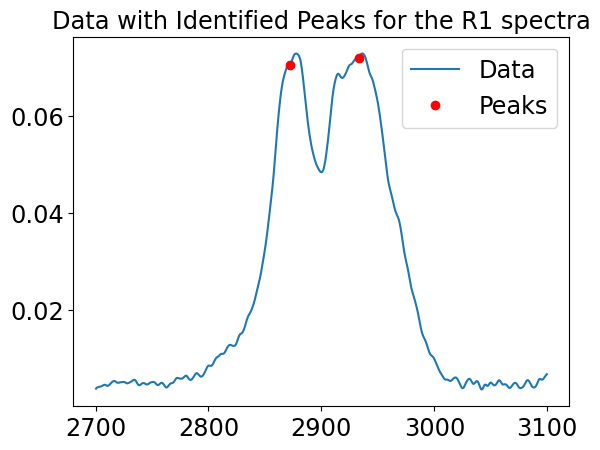

In [ ]:
# Filter IR data by a specific wavenumber range
filtered_df = IR1_df[(IR1_df.index >= 2700) & (IR1_df.index <= 3100)]

# the data
x_2peak_example = filtered_df.index.values
y_2peak_example = filtered_df['IR1_190627_y'].values

peaks_2peak_exmaple = find_significant_peaks(y_2peak_example, 0.1, 1, 100, peak_height_percentage = 0.3)

fig, ax = plt.subplots()
ax.plot(x_2peak_example, y_2peak_example, label='Data')
ax.plot([x_2peak_example[i] for i in peaks_2peak_exmaple], [y_2peak_example[i] for i in peaks_2peak_exmaple], 'ro', label='Peaks')
ax.set_title('Data with Identified Peaks for the R1 spectra')
ax.legend()
plt.show()

And peak-fitting:

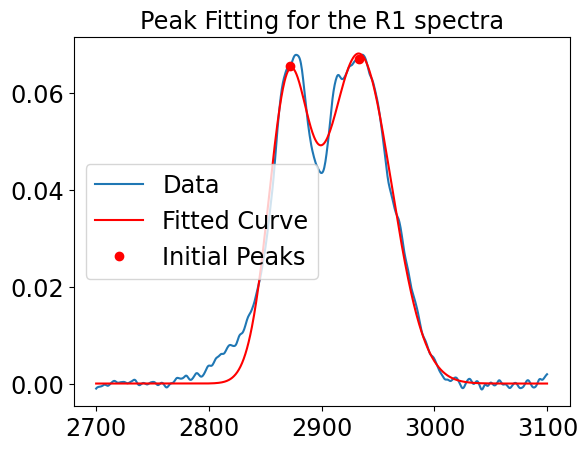

In [ ]:
# Correct the baseline applying the function above and define cost function for plots comparison
corrected_x, corrected_y, slope, intercept = calculate_and_subtract_baseline(x_2peak_example, y_2peak_example, 0.1)

# Define the initial guesses for the parameters
n_peaks = len(peaks_2peak_exmaple)
initial_guesses = np.zeros(3 * n_peaks)
for i, peak_index in enumerate(peaks_2peak_exmaple):
    initial_guesses[i * 3] = corrected_y[peak_index]                    # Amplitude initial guess
    initial_guesses[i * 3 + 1] = corrected_x[peak_index]     # Centre initial guess
    initial_guesses[i * 3 + 2] = 10                              # Width initial guess

# Perform curve fitting
popt, pcov = curve_fit(multi_gaussian, corrected_x, corrected_y, p0=initial_guesses)

# Plot the data and the fitted curve
fig, ax = plt.subplots()
ax.plot(corrected_x, corrected_y, label='Data')
ax.plot(corrected_x, multi_gaussian(corrected_x, *popt), 'r-', label='Fitted Curve')
ax.plot([corrected_x[i] for i in peaks_2peak_exmaple], [corrected_y[i] for i in peaks_2peak_exmaple], 'ro', label='Initial Peaks')
ax.set_title('Peak Fitting for the R1 spectra')
ax.legend()
plt.show()

Now, let's actually look at the *two* signals we are interested in.

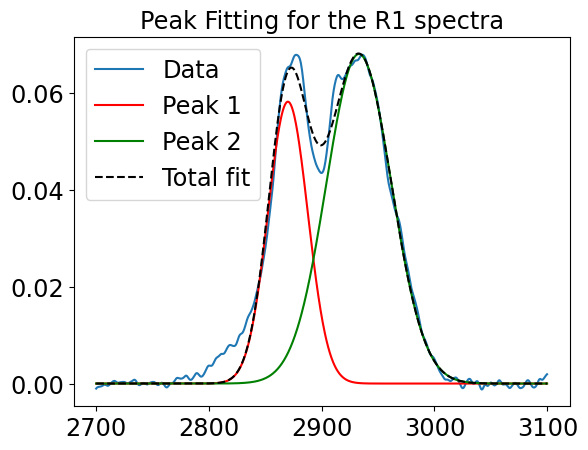

In [ ]:
# Extract individual Gaussian parameters from popt
gaussian_params = [popt[i:i+3] for i in range(0, len(popt), 3)]

# Plot the data
fig, ax = plt.subplots()
ax.plot(corrected_x, corrected_y, label='Data')

colors = ['r', 'g', 'b', 'y', 'm', 'c']

# Plot each Gaussian separately
for i, params in enumerate(gaussian_params):
    ax.plot(corrected_x, gaussian(corrected_x, *params), colors[i % len(colors)] + '-', label='Peak ' + str(i+1))

# Plot the sum of all Gaussians (= fitted curve)
ax.plot(corrected_x, gaussian_two_peaks(corrected_x, *popt), 'k--', label='Total fit')

ax.set_title('Peak Fitting for the R1 spectra')
ax.legend()
plt.show()

## PRACTICE QUESTION

Why can't we just numerically integrate under the raw signal (before the peak fitting)? What would that tell us that is different than what this tells us?



---



**test**



---



# Let's find the areas

First, let's use the trapezoid rule because we know it works well. We are using it on the Gaussians!

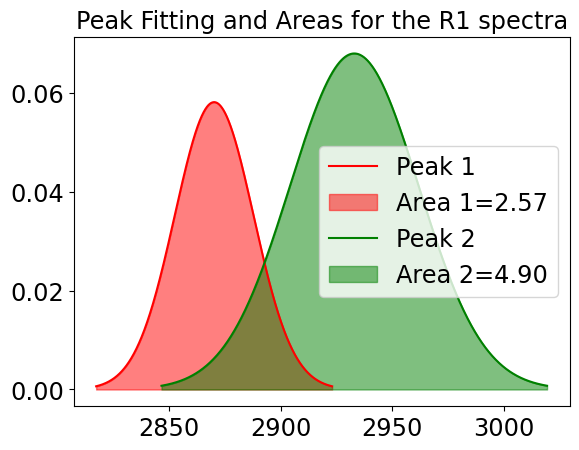

In [ ]:
fig, ax = plt.subplots()

# Plot each Gaussian separately and compute area
for i, params in enumerate(gaussian_params):
    x = np.linspace(params[1] - 3 * params[2], params[1] + 3 * params[2], 1000)
    y = gaussian(x, *params)
    ax.plot(x, y, colors[i % len(colors)] + '-', label='Peak ' + str(i+1))

    # define specific gaussian for trapezoid rule
    gaussian_specific = lambda x: gaussian(x, *params)

    # calculate and plot the area under each Gaussian curve
    area = trapezoid_rule(gaussian_specific, x[0], x[-1], len(x))
    ax.fill_between(x, y, color=colors[i % len(colors)], alpha=0.5, label=f"Area {i+1}={area:.2f}")

ax.set_title('Peak Fitting and Areas for the R1 spectra')
ax.legend()
plt.show()

## PRACTICE QUESTION

This figure is bad! Can you fix it? Think about accessibility in addition to axis labels, lagend placement, etc.

 Let's see how changing the bin number (ie. how long we need to integrate) changes the accuracy here. We'll start with the Rectangle Rule first (because we know it isn't the best).

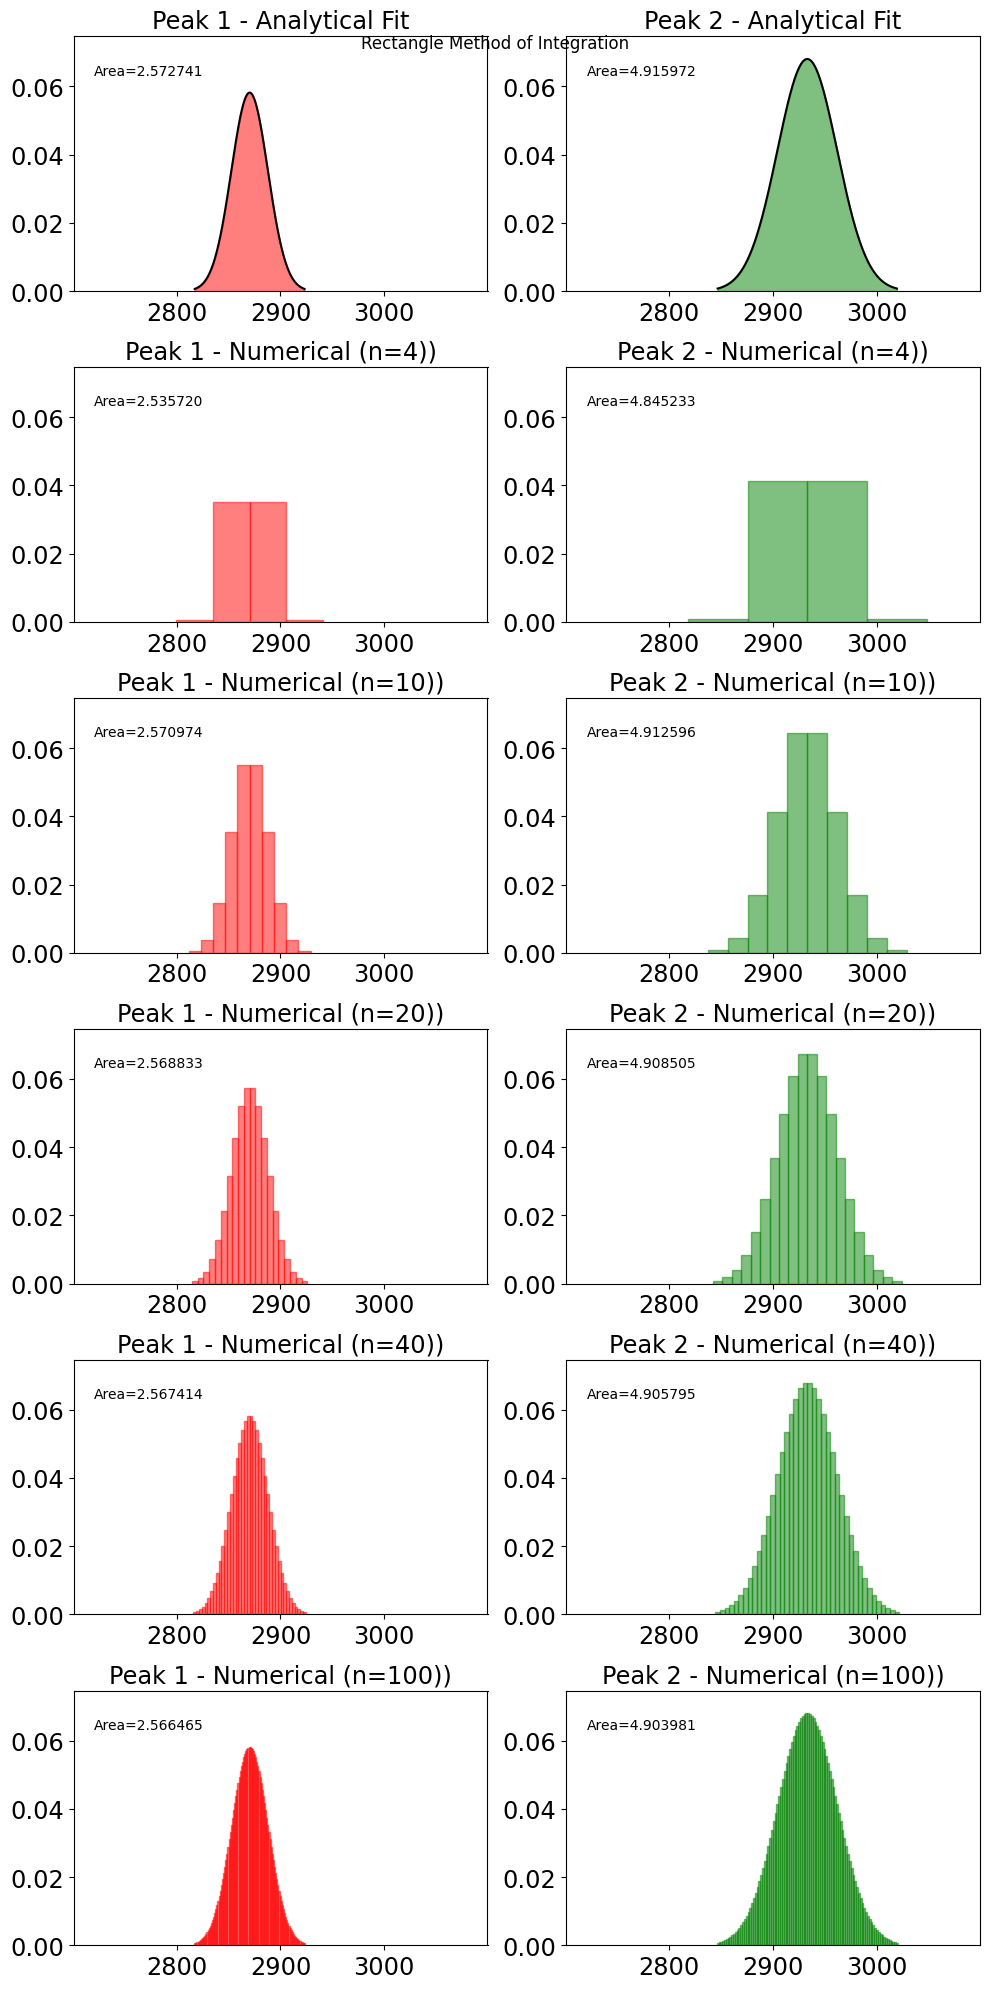

In [ ]:
ncols = 2
n_values = [4, 10, 20, 40, 100]  # Change as needed
nrows = len(n_values)+1
x_min = corrected_x[0]
x_max = corrected_x[-1]
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 20))

# Plot analytical fits
for i, params in enumerate(gaussian_params):
    x = np.linspace(params[1] - 3*params[2], params[1] + 3*params[2], 10000)
    y = gaussian(x, *params)
    ax[0, i].plot(x, y, 'black')
    ax[0, i].fill_between(x, y, color=colors[i], alpha=0.5)

    # Calculate and annotate area
    a, b, c = params
    area = abs(a) * c * np.sqrt(2*np.pi)
    ax[0, i].annotate(f"Area={area:.6f}", xy=(0.05, 0.85), xycoords='axes fraction')

# Plot bars for numerical method subtivision
for idx, n in enumerate(n_values, start=1):  # Change start here
    for j, params in enumerate(gaussian_params):

        x = np.linspace(params[1] - 3*params[2], params[1] + 3*params[2], n)
        y = gaussian(x, *params)
        width = (x[-1]-x[0])/(n-1)
        ax[idx, j].bar(x, y, width=width, color=colors[j], alpha=0.5, edgecolor=colors[j])

        # Calculate and annotate area
        area = sum(y) * width
        ax[idx, j].annotate(f"Area={area:.6f}", xy=(0.05, 0.85), xycoords='axes fraction')

# Layout adjustments
for i in range(nrows):
    for j in range(ncols):

        ax[i, j].set_ylim([0, np.max(corrected_y)*1.1])
        ax[i, j].set_xlim([x_min, x_max])
        if i == 0:
            ax[i, j].set_title(f"Peak {j+1} - Analytical Fit")
        else:
            ax[i, j].set_title(f"Peak {j+1} - Numerical (n={n_values[i-1]}))")

plt.tight_layout()
plt.suptitle("Rectangle Method of Integration")
plt.show()


## PRACTICE QUESTION

Add comments above for your benefit!



---

Now let's recreate the same plot for for the trapezoid rule!

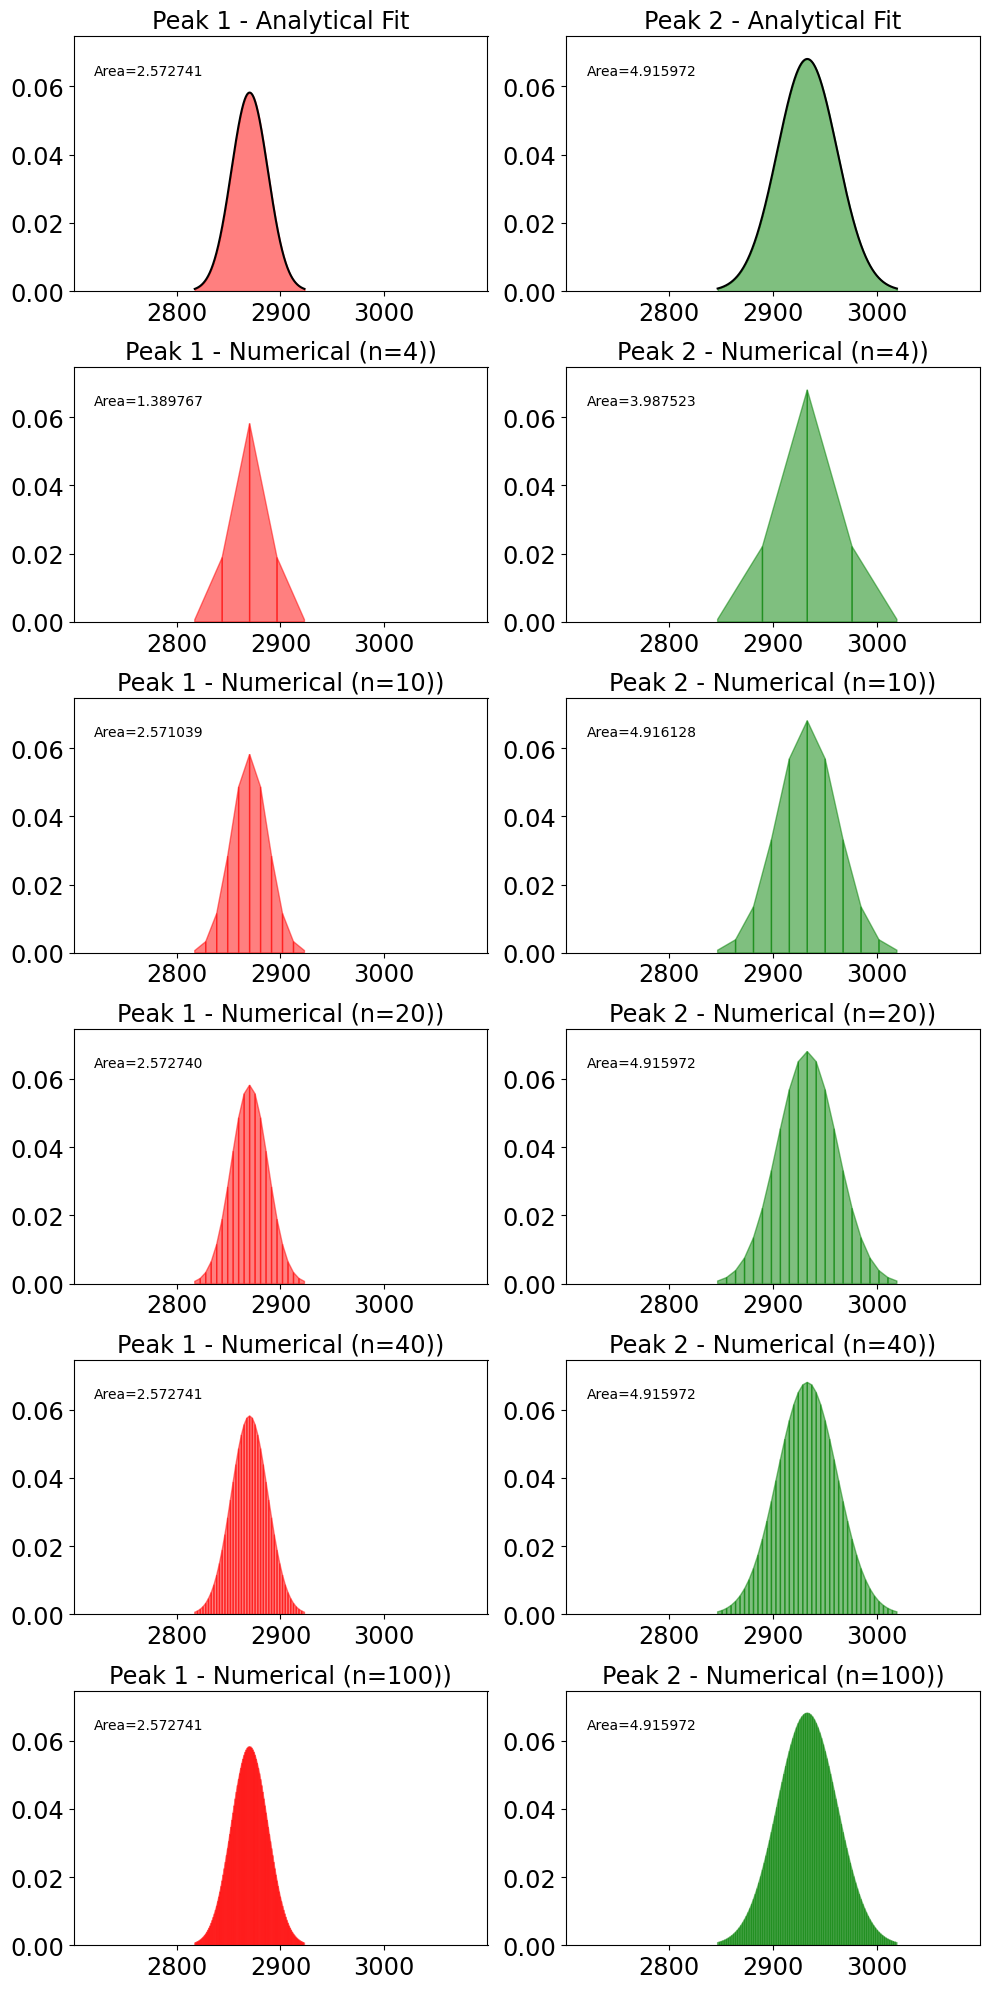

In [ ]:
ncols = 2
n_values = [4, 10, 20, 40, 100]  # Change as needed
nrows = len(n_values) + 1

fig, ax = plt.subplots(nrows, ncols, figsize=(10, 20))

# Plot analytical fits
for i, params in enumerate(gaussian_params):
    x = np.linspace(params[1] - 3*params[2], params[1] + 3*params[2], 10000)
    y = gaussian(x, *params)
    ax[0, i].plot(x, y, 'black')
    ax[0, i].fill_between(x, y, color=colors[i], alpha=0.5)

    # Calculate and annotate area
    a, b, c = params
    area = abs(a) * c * np.sqrt(2 * np.pi)
    ax[0, i].annotate(f"Area={area:.6f}", xy=(0.05, 0.85), xycoords='axes fraction')

# Plot trapezoids for numerical approximation
for idx, n in enumerate(n_values, start=1):  # Change start here
    for j, params in enumerate(gaussian_params):
        x_interval = np.linspace(params[1] - 3 * params[2], params[1] + 3 * params[2], n+1)
        y_interval = gaussian(x_interval, *params)

        # Plot trapezoids
        for i in range(n):
            pts = [[x_interval[i], 0], [x_interval[i], y_interval[i]],
                         [x_interval[i+1], y_interval[i+1]], [x_interval[i+1], 0]]

            trapezoid = patches.Polygon(pts, closed=True, color=colors[j], alpha=0.5)
            ax[idx, j].add_patch(trapezoid)

        # Calculate and annotate area
        area = trapezoid_rule(gaussian_specific, x_min, x_max, n)
        ax[idx, j].annotate(f"Area={area:.6f}", xy=(0.05, 0.85), xycoords='axes fraction')

# Layout adjustments
for i in range(nrows):
    for j in range(ncols):
        ax[i, j].set_ylim([0, np.max(corrected_y) * 1.1])
        ax[i, j].set_xlim([x_min, x_max])
        if i == 0:
            ax[i, j].set_title(f"Peak {j+1} - Analytical Fit")
        else:
            ax[i, j].set_title(f"Peak {j+1} - Numerical (n={n_values[i - 1]}))")

plt.tight_layout()
plt.show()

## PRACTICE QUESTION

Looking at the above two figures, convince yourself why you probably won't ever want to use the Rectangle rule.


---



**notes**



---

What? Where is the Simpson's rule? In your homework!



---



# Submit your notebook

It's time to download your notebook and submit it on Canvas. Go to the File menu and click **Download** -> **Download .ipynb**

Then, go to **Canvas** and **submit your assignment** on the assignment page. Once it is submitted, swing over to the homework now and start working through the paper.